In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as st

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step 1: 

Alternate Hypothesis (Bold Claim): $H_1 \neq  500 $

Null Hypothesis (Status Quo):  $H_0 = 500 $

Step 2: 
    
Collect a sample of size n=10

$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$

Compute sample mean$$ \bar{x} \ = \ ? $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s /\sqrt{n}}$$

Step - 4: Decide $ \alpha $ or significance level : take $ \alpha $ = 0.1

Step - 5.1: two tailed t-test:$$ reject \ H_0 \ if \ t-score > t-critical $$

Step - 5.2: Compute p-value

In [2]:
# calculate sample mean

l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sample_mean = sum(l)/len(l)
sample_mean

465.3

In [3]:
# Two Tail - Calculating the t-critical value

confidence_level = 0.90

alpha = 1 - confidence_level

t_critical = t.ppf(q = 1 - alpha/2, df = 9) # Two tailed t-score for 90% Confidence Level
# q = significance level
# df = degree of freedom n-1
print(t_critical)

1.8331129326536335


In [4]:
# t_score for sampling distribution
def t_score(sample_size, sample_mean, pop_mean, sample_std_dev):
    num = sample_mean - pop_mean
    den = sample_std_dev/sample_size**0.5
    return num/den

In [5]:
# calculating sample_std_dev
def std_dev(x):
    m=sum(x)/len(x)
    v=0
    for i in x:
        v+=(i-m)**2
    v=v/(len(x)-1)
    v=v**.5
    return v

sample_std_dev =std_dev(l)
sample_std_dev

86.84859110991827

In [6]:
# defining the sample and population parameters
sample_size = 10
pop_mean = 500

In [7]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std_dev)

print(t)

-1.2634751284446715


Text(465.3, 0.0007, 'x_bar')

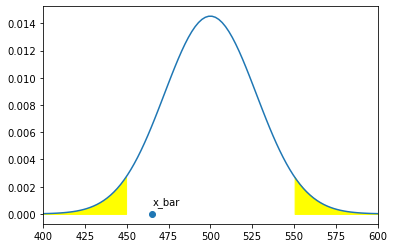

In [8]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std_dev / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='yellow')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='yellow')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [9]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [10]:

# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


#### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step 1:

Alternate Hypothesis (Bold Claim):  $𝐻_1>4 $

Null Hypothesis (Status Quo):  $𝐻_0 \leq 4$

Step 2:

Collect a sample of size n=20

$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
 
Compute sample mean$$ \bar{x} \ = \ ? $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s /\sqrt{n}}$$

Step - 4: Decide $ \alpha $ or significance level : take $ \alpha $ = 0.05

Step - 5.1: one tailed t-test:$$ reject \ H_0 \ if \ t-score > t-critical $$

Step - 5.2: Compute p-value

In [11]:
# calculate sample mean

l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

sample_mean = sum(l)/len(l)
sample_mean

4.25

In [12]:
# One Tail - Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q = 1 - alpha, df = 19) # One tailed t-score for 95% Confidence Level
# q = significance level
# df = degree of freedom n-1
print(t_critical)

1.729132811521367


In [13]:
# calculating sample_std_dev

sample_std_dev =std_dev(l)
sample_std_dev

0.8506963092234007

In [14]:
# defining the sample and population parameters
sample_size = 20
pop_mean = 4

In [15]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std_dev)

print(t)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

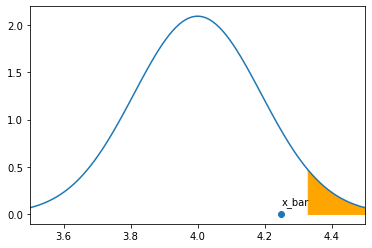

In [16]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std_dev / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [17]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [18]:
# Conclusion using p test

p_value = (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step 1:

Alternate Hypothesis (Bold Claim):  $𝐻_1>15 $

Null Hypothesis (Status Quo):  $𝐻_0 \leq 15$

Step 2:

Collect a sample of size n=20

$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$

 
Compute sample mean$$ \bar{x} \ = \ ? $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s /\sqrt{n}}$$

Step - 4: Decide $ \alpha $ or significance level : take $ \alpha $ = 0.05

Step - 5.1: one tailed t-test:$$ reject \ H_0 \ if \ t-score > t-critical $$

Step - 5.2: Compute p-value

In [19]:
# calculate sample mean

l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

sample_mean = sum(l)/len(l)
sample_mean

15.098999999999998

In [20]:
# One Tail - Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q = 1 - alpha, df = 19) # One tailed t-score for 95% Confidence Level
# q = significance level
# df = degree of freedom n-1
print(t_critical)

1.729132811521367


In [21]:
# calculating sample_std_dev

sample_std_dev =std_dev(l)
sample_std_dev

1.0253671999517255

In [22]:
# defining the sample and population parameters
sample_size = 20
pop_mean = 15

# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std_dev)

print(t)

0.4317882018907916


Text(15.098999999999998, 0.1, 'x_bar')

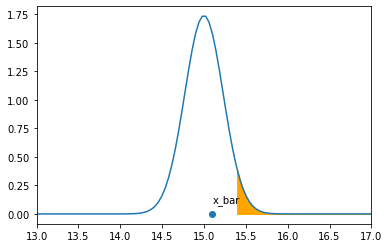

In [23]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std_dev / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [24]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [25]:
# Conclusion using p test

p_value = (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3329476775823499
Fail to reject Null Hypothesis


#### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step 1:

Alternate Hypothesis (Bold Claim):  $𝐻_1<100 $

Null Hypothesis (Status Quo):  $𝐻_0 \geq 100$

Step 2:

Collect a sample of size n=100

 
Compute sample mean$$ \bar{x} \ = \ ? $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{s /\sqrt{n}}$$

Step - 4: Decide $ \alpha $ or significance level : take $ \alpha $ = 0.01

Step - 5.1: one tailed t-test:$$ reject \ H_0 \ if \ t-score > t-critical $$

Step - 5.2: Compute p-value

In [26]:
l = np.random.normal(loc=100, scale=2, size=100)

In [27]:
# calculate sample mean

sample_mean = sum(l)/len(l)
sample_mean

100.00985883324992

In [28]:
# One Tail - Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.99

alpha = 1 - confidence_level

t_critical = t.ppf(q = 1 - alpha, df = 19) # One tailed t-score for 95% Confidence Level
# q = significance level
# df = degree of freedom n-1
print(t_critical)

2.539483190622288


In [29]:
# calculating sample_std_dev

sample_std_dev =std_dev(l)
sample_std_dev

1.837888219380155

In [30]:
# defining the sample and population parameters
sample_size = 100
pop_mean = 100

# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std_dev)

print(t)

0.05364218098773633


Text(100.00985883324992, 0.02, 'x_bar')

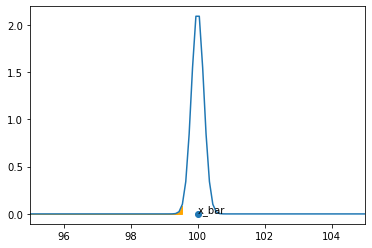

In [31]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std_dev / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [32]:
# Conclusion using t test

if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [33]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4786101246518234
Fail to reject Null Hypothesis
